In [1]:
'''
def max_avr(im_):
    b_ = 0
    w_, h_ = im_.size
    for x_ in range(w_):
        for y_ in range(h_):
            a_ = im_.getpixel((x_,y_))
            #print(pix)
          
    return new_im_

b = cut(fig,50,50)
h_ = 50
w_ = 50
dif = [list(b.getpixel((0,0)))]
print(dif)
print('Start : ')
for i_ in range(h_):
    for j_ in range(w_):
        tempor_ = len(dif)
        print(tempor_)
        a = list(b.getpixel((i_,j_)))
        print(a[:])
        print(dif[:])
        sas = 0
        for k_ in range(tempor_):
            if dif[k_] == a[0]:
                sas =+ 1
        if sas != 0:
            dif.append(a)
            print(dif)

'''

"\ndef max_avr(im_):\n    b_ = 0\n    w_, h_ = im_.size\n    for x_ in range(w_):\n        for y_ in range(h_):\n            a_ = im_.getpixel((x_,y_))\n            #print(pix)\n          \n    return new_im_\n\nb = cut(fig,50,50)\nh_ = 50\nw_ = 50\ndif = [list(b.getpixel((0,0)))]\nprint(dif)\nprint('Start : ')\nfor i_ in range(h_):\n    for j_ in range(w_):\n        tempor_ = len(dif)\n        print(tempor_)\n        a = list(b.getpixel((i_,j_)))\n        print(a[:])\n        print(dif[:])\n        sas = 0\n        for k_ in range(tempor_):\n            if dif[k_] == a[0]:\n                sas =+ 1\n        if sas != 0:\n            dif.append(a)\n            print(dif)\n\n"

{'red': 0, 'green': 403561, 'blue': 3262, 'black': 153782, 'yellow': 225827, 'no match': 0}


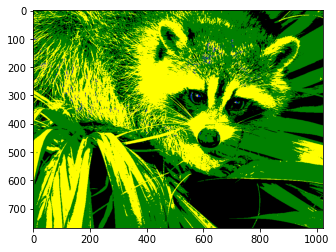

In [2]:
import numpy as np
from matplotlib import colors
from scipy.spatial import cKDTree as KDTree
from scipy.misc import face

REDUCED_COLOR_SPACE = True

# borrow a list of named colors from matplotlib
if REDUCED_COLOR_SPACE:
    use_colors = {k: colors.cnames[k] for k in ['red', 'green', 'blue', 'black', 'yellow', 'purple']}
else:
    use_colors = colors.cnames

# translate hexstring to RGB tuple
named_colors = {k: tuple(map(int, (v[1:3], v[3:5], v[5:7]), 3*(16,)))
                for k, v in use_colors.items()}
ncol = len(named_colors)

if REDUCED_COLOR_SPACE:
    ncol -= 1
    no_match = named_colors.pop('purple')
else:
    no_match = named_colors['purple']

# make an array containing the RGB values 
color_tuples = list(named_colors.values())
color_tuples.append(no_match)
color_tuples = np.array(color_tuples)

color_names = list(named_colors)
color_names.append('no match')

# get example picture
img = face()

# build tree
tree = KDTree(color_tuples[:-1])
# tolerance for color match `inf` means use best match no matter how
# bad it may be
tolerance = np.inf
# find closest color in tree for each pixel in picture
dist, idx = tree.query(img, distance_upper_bound=tolerance)
# count and reattach names
counts = dict(zip(color_names, np.bincount(idx.ravel(), None, ncol+1)))

print(counts)

import pylab

pylab.imshow(img)
pylab.savefig('orig.png')
pylab.clf()
pylab.imshow(color_tuples[idx])
pylab.savefig('minimal.png' if REDUCED_COLOR_SPACE else 'reduced.png')